# Hacker News Dataset Analysis
> This notebook is a quick data profiling of Hacker News dataset

In [6]:
import glob
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from utils import import_data
from wordcloud import WordCloud


DATA_DIR = '../data'

### Importing Data

In [8]:
data = import_data(DATA_DIR)

Imported 881052 lines from 31 files


> What the data looks like?

In [9]:
data.head(5)

,app_id,clicks,conversions,filters,hits,index,nb_hits,query,query_id,timestamp
0,UJ5WYC0L7X,NaN,NaN,"[{'operator': ':', 'value': 'story', 'attribut...",NaN,Item_production,0,petsburghtherapyservices,3335322a02bfebf7ebf2a80e7b77035f,2018-07-14T00:00:43.371Z
1,UJ5WYC0L7X,NaN,NaN,"[{'operator': ':', 'value': 'story', 'attribut...","[14462785, 7211514, 16659656, 3029872, 1718990...",Item_production,119174,facebook,76c56c69ed950db5a095849059641c81,2018-07-14T00:04:33.090Z
2,UJ5WYC0L7X,NaN,NaN,"[{'operator': ':', 'value': 'story', 'attribut...",[17479386],Item_production_sort_date,1,Use of AI in the fashion industry,3d72f045b4149ce962478fd0fd6a61de,2018-07-14T00:02:29.537Z
3,UJ5WYC0L7X,NaN,NaN,"[{'operator': ':', 'value': 'story', 'attribut...","[17339278, 17352526, 17305296, 17524937, 17385...",Item_production,6,Medical research,b03ddf12f453d1bbd8d407fdf423cd2d,2018-07-14T00:04:34.283Z
4,UJ5WYC0L7X,"[{'object_id': '6349347', 'position': 18, 'tim...",NaN,"[{'operator': ':', 'value': 'story', 'attribut...","[3686840, 4806852, 15714318, 250704, 9108209, ...",Item_production,6881,startup ideas,a98e5e3d873dfb8f419756542a94b2f1,2018-07-14T00:01:41.774Z


- We have 10 columns
- `query` is the query string
- `clicks` is a dict (when there is a click) with click hit
- `hits` is restrain to 10 values

> Let's have a look at the `query` column, we can start with an ugly wordcloud (not a fan, but it can be useful)

(-0.5, 1439.5, 899.5, -0.5)

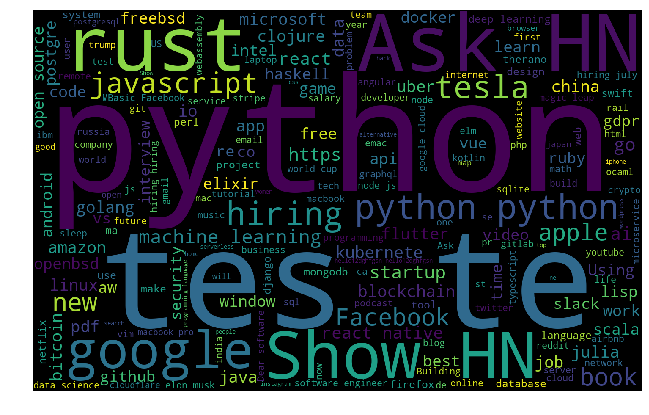

In [50]:
word_list = pd.Series(data['query'].tolist()).astype(str)
cloud = WordCloud(width=1440, height=900).generate(" ".join(word_list.astype(str)))
plt.figure(figsize=(12, 7))
plt.imshow(cloud)
plt.axis('off')

This is of course a lot of developer/startups terms. Many programming languages.. What's the minimum and maximum length of those strings?

In [14]:
words_len = word_list.apply(len)

print('Average length is: {:.2f}'.format(np.mean(words_len)))
print('Maximum length is: {}'.format(np.max(words_len)))
print('Minimum length is: {}'.format(np.min(words_len)))

Average length is: 12.99
Maximum length is: 496
Minimum length is: 0


Text(0, 0.5, 'Probability')

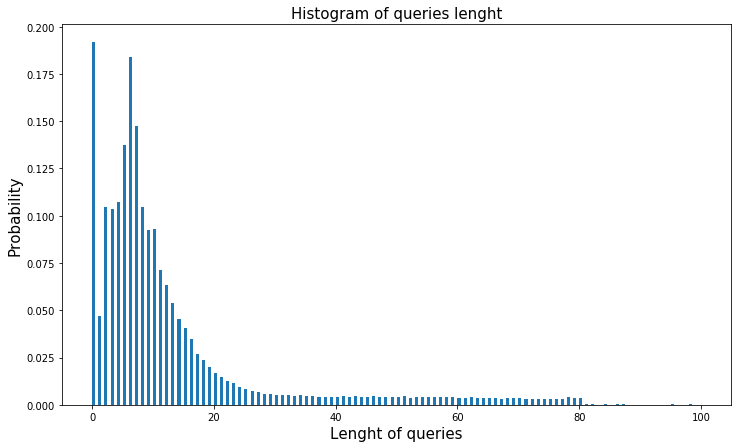

In [49]:
plt.figure(figsize=(12, 7))
plt.hist(words_len, bins=200, range=[0, 100], normed=True)
plt.title('Histogram of queries lenght', fontsize=15)
plt.xlabel('Lenght of queries', fontsize=15)
plt.ylabel('Probability', fontsize=15)


> Let's deep dive on the hits and clicks

First, how many hits do we have for a single query

In [19]:
data.groupby('nb_hits').count().head(10)

,app_id,clicks,conversions,filters,hits,index,query,query_id,timestamp
nb_hits,,,,,,,,,
0,63043,31,2,63004,0,63043,63043,63043,63043
1,90539,6801,278,90504,90501,90539,90539,90539,90539
2,23427,4343,172,23372,23405,23427,23427,23427,23427
3,14918,3335,141,14903,14901,14918,14918,14918,14918
4,11487,2908,109,11465,11470,11487,11487,11487,11487
5,9195,2436,104,9170,9179,9195,9195,9195,9195
6,7633,2142,82,7622,7625,7633,7633,7633,7633
7,7307,1956,69,7286,7298,7307,7307,7307,7307
8,5905,1713,80,5905,5895,5905,5905,5905,5905


Let's have a look at the `nb_hits` histogram

Text(0, 0.5, 'Probability')

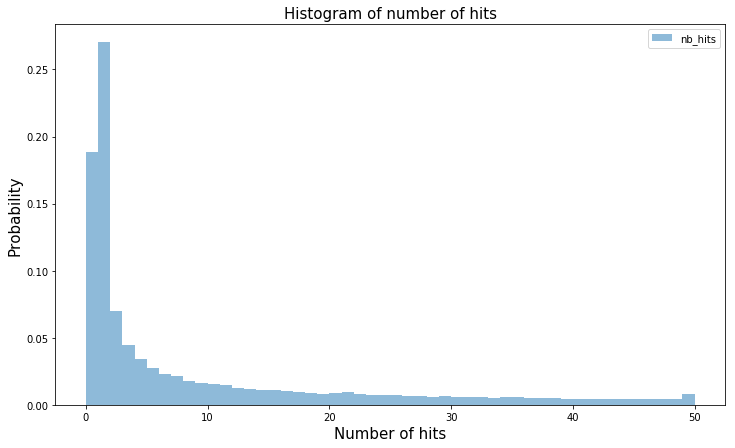

In [48]:
plt.figure(figsize=(12, 7))
plt.hist(data['nb_hits'], bins=50, range=[0, 50], normed=True, alpha=0.5, label='nb_hits')
plt.title('Histogram of number of hits', fontsize=15)
plt.legend()
plt.xlabel('Number of hits', fontsize=15)
plt.ylabel('Probability', fontsize=15)

Let's do the same for clicks

In [21]:
data['nb_clicks'] = data['clicks'].apply(lambda x: len(x) if isinstance(x, list) else 0)
data.groupby('nb_clicks').count().head(10)

,app_id,clicks,conversions,filters,hits,index,nb_hits,query,query_id,timestamp
nb_clicks,,,,,,,,,,
0,693116,0,120,687657,604302,693116,693116,693116,693116,693116
1,140774,140774,1829,140701,132792,140774,140774,140774,140774,140774
2,24162,24162,2479,24145,22498,24162,24162,24162,24162,24162
3,8940,8940,1047,8932,8115,8940,8940,8940,8940,8940
4,4631,4631,549,4628,4178,4631,4631,4631,4631,4631
5,2664,2664,371,2663,2415,2664,2664,2664,2664,2664
6,1605,1605,242,1604,1449,1605,1605,1605,1605,1605
7,1027,1027,165,1027,933,1027,1027,1027,1027,1027
8,701,701,92,701,622,701,701,701,701,701


Text(0, 0.5, 'Probability')

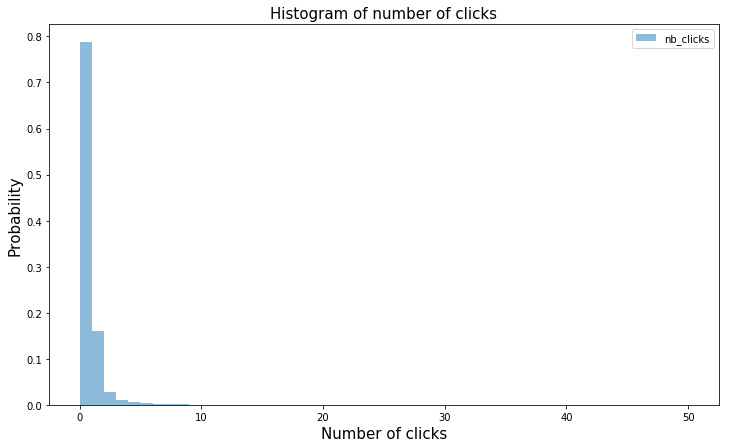

In [47]:
plt.figure(figsize=(12, 7))
plt.hist(data['nb_clicks'], bins=50, range=[0, 50], normed=True, alpha=0.5, label='nb_clicks')
plt.title('Histogram of number of clicks', fontsize=15)
plt.legend()
plt.xlabel('Number of clicks', fontsize=15)
plt.ylabel('Probability', fontsize=15)


An interresting other metric would be the first click position:

In [41]:
def min_position(row):
    if isinstance(row['clicks'], list):
        pos = [click['position'] for click in row['clicks']]
        return np.min(pos)
    return 0
    
data['first_click_position'] = data.apply(min_position, axis=1, raw=True)
data.groupby('first_click_position').count().head(10)

,app_id,clicks,conversions,filters,hits,index,nb_hits,query,query_id,timestamp,nb_clicks
first_click_position,,,,,,,,,,,
0,693116,0,120,687657,604302,693116,693116,693116,693116,693116,693116
1,70971,70971,3111,70949,69404,70971,70971,70971,70971,70971,70971
2,27391,27391,1063,27384,26210,27391,27391,27391,27391,27391,27391
3,16362,16362,597,16356,15422,16362,16362,16362,16362,16362,16362
4,11626,11626,434,11619,10815,11626,11626,11626,11626,11626,11626
5,9059,9059,316,9055,8281,9059,9059,9059,9059,9059,9059
6,7608,7608,271,7597,6931,7608,7608,7608,7608,7608,7608
7,6230,6230,216,6224,5583,6230,6230,6230,6230,6230,6230
8,5362,5362,182,5360,4789,5362,5362,5362,5362,5362,5362


> What's the average first click position?

In [43]:
np.mean(data[data['first_click_position'] > 0]['first_click_position'])

4.546654180146433

We can make an histogram of the first click position

Text(0, 0.5, 'Probability')

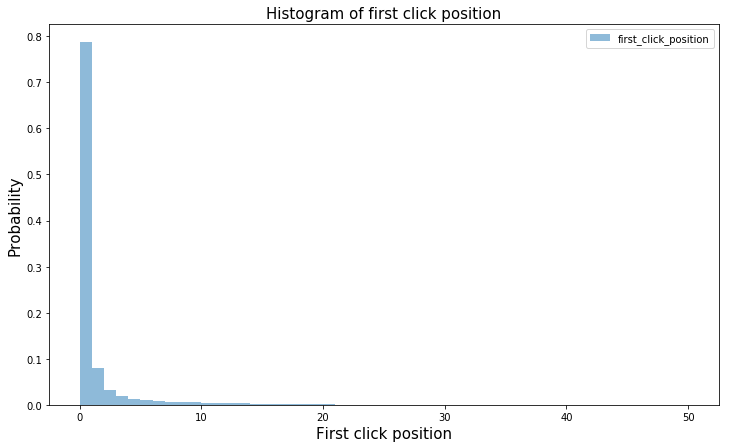

In [46]:
plt.figure(figsize=(12, 7))
plt.hist(data['first_click_position'], bins=50, range=[0, 50], normed=True, alpha=0.5, label='first_click_position')
plt.title('Histogram of first click position', fontsize=15)
plt.legend()
plt.xlabel('First click position', fontsize=15)
plt.ylabel('Probability', fontsize=15)


> We now have a better understanding of the data, the next step would be to evaluate the search perfomance with adapted performance metrics. We'll do that in another jupyter notebook.